In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
pd.set_option('max_columns', 50)
mpl.rcParams['lines.linewidth'] = 2

%matplotlib inline

In [16]:
# Input Data 
data_vis = pd.read_csv("dataset.csv",encoding='latin1')
data_vis.tail(10)

,id,order_date,user_id
192903,326827,2019-12-27,133329
192904,326828,2019-12-27,133329
192905,326829,2019-12-27,133335
192906,326830,2019-12-27,115513
192907,326831,2019-12-27,115513
192908,326833,2019-12-27,131981
192909,326834,2019-12-27,54449
192910,326835,2019-12-27,52375
192911,326837,2019-12-27,118653
192912,326838,2019-12-27,133327


In [17]:
display(data_vis.iloc[96671]) 

id                225126
order_date    2019-07-29
user_id            98336
Name: 96671, dtype: object

In [18]:
data_vis['order_period'] = pd.to_datetime(arg=data_vis['order_date'], 
                                   format='%Y-%m-%d')
data_vis['order_period'] = data_vis['order_period'].apply(lambda x: x.strftime('%Y-%m'))
data_vis


,id,order_date,user_id,order_period
0,114363,2019-01-01,53424,2019-01
1,114364,2019-01-01,77226,2019-01
2,114366,2019-01-01,67632,2019-01
3,114369,2019-01-01,63167,2019-01
4,114370,2019-01-01,32047,2019-01
...,...,...,...,...
192908,326833,2019-12-27,131981,2019-12
192909,326834,2019-12-27,54449,2019-12
192910,326835,2019-12-27,52375,2019-12
192911,326837,2019-12-27,118653,2019-12


In [19]:
data_vis.set_index('user_id', inplace=True)
data_vis['cohort_group'] = pd.to_datetime(arg=data_vis['order_date'], 
                                   format='%Y-%m-%d')
data_vis['cohort_group'] = data_vis.groupby(level=0)['cohort_group'].min().apply(lambda x: x.strftime('%Y-%m'))
data_vis.reset_index(inplace=True)
data_vis.head()

,user_id,id,order_date,order_period,cohort_group
0,53424,114363,2019-01-01,2019-01,2019-01
1,77226,114364,2019-01-01,2019-01,2019-01
2,67632,114366,2019-01-01,2019-01,2019-01
3,63167,114369,2019-01-01,2019-01,2019-01
4,32047,114370,2019-01-01,2019-01,2019-01


In [20]:
grouped = data_vis.groupby(['cohort_group', 'order_period'])

# count the unique users
cohorts = grouped.agg({'user_id': pd.Series.nunique})

# make the column names more meaningful
cohorts.rename(columns={'user_id': 'TotalUsers'}, inplace=True)
cohorts.head()

TotalUsers
cohort_group order_period            
2019-01      2019-01             4520
             2019-02             2093
             2019-03             1673
             2019-04             1342
             2019-05             1066

In [21]:
def cohort_period(data_vis):
    data_vis['Cohort_period'] = np.arange(len(data_vis)) + 1
    return data_vis

cohorts = cohorts.groupby(level=0).apply(cohort_period)
cohorts.head()

TotalUsers  Cohort_period
cohort_group order_period                           
2019-01      2019-01             4520              1
             2019-02             2093              2
             2019-03             1673              3
             2019-04             1342              4
             2019-05             1066              5

In [22]:
# reindex the DataFrame
cohorts.reset_index(inplace=True)
cohorts.set_index(['cohort_group', 'Cohort_period'], inplace=True)

# create a Series holding the total size of each CohortGroup
cohort_group_size = cohorts['TotalUsers'].groupby(level=0).first()
cohort_group_size.head()

cohort_group
2019-01    4520
2019-02    2466
2019-03    2662
2019-04    2074
2019-05    2616
Name: TotalUsers, dtype: int64

In [23]:
cohorts['TotalUsers'].head()

cohort_group  Cohort_period
2019-01       1                4520
              2                2093
              3                1673
              4                1342
              5                1066
Name: TotalUsers, dtype: int64

In [24]:
cohorts['TotalUsers'].unstack(0).head()

cohort_group,2019-01,2019-02,2019-03,2019-04,2019-05,2019-06,2019-07,2019-08,2019-09,2019-10,2019-11,2019-12
Cohort_period,,,,,,,,,,,,
1,4520.0,2466.0,2662.0,2074.0,2616.0,2802.0,3234.0,2080.0,1697.0,1622.0,1442.0,916.0
2,2093.0,1024.0,927.0,709.0,786.0,1200.0,1356.0,874.0,675.0,633.0,527.0,NaN
3,1673.0,611.0,588.0,541.0,560.0,667.0,902.0,602.0,473.0,405.0,NaN,NaN
4,1342.0,483.0,558.0,477.0,368.0,492.0,729.0,476.0,358.0,NaN,NaN,NaN
5,1066.0,494.0,518.0,333.0,292.0,428.0,610.0,395.0,NaN,NaN,NaN,NaN


In [25]:
user_retention = cohorts['TotalUsers'].unstack(0).divide(cohort_group_size, axis=1)
user_retention.head(10)

cohort_group,2019-01,2019-02,2019-03,2019-04,2019-05,2019-06,2019-07,2019-08,2019-09,2019-10,2019-11,2019-12
Cohort_period,,,,,,,,,,,,
1,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0
2,0.463053,0.415247,0.348234,0.341851,0.300459,0.428266,0.419295,0.420192,0.397761,0.390259,0.365465,NaN
3,0.370133,0.247770,0.220887,0.260849,0.214067,0.238044,0.278912,0.289423,0.278727,0.249692,NaN,NaN
4,0.296903,0.195864,0.209617,0.229990,0.140673,0.175589,0.225417,0.228846,0.210961,NaN,NaN,NaN
5,0.235841,0.200324,0.194591,0.160559,0.111621,0.152748,0.188621,0.189904,NaN,NaN,NaN,NaN
6,0.265708,0.188159,0.143877,0.127290,0.094801,0.133476,0.150588,NaN,NaN,NaN,NaN,NaN
7,0.258407,0.140714,0.123967,0.112343,0.074541,0.105282,NaN,NaN,NaN,NaN,NaN,NaN
8,0.202876,0.114761,0.116078,0.098843,0.061544,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,0.168805,0.102595,0.097671,0.081003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


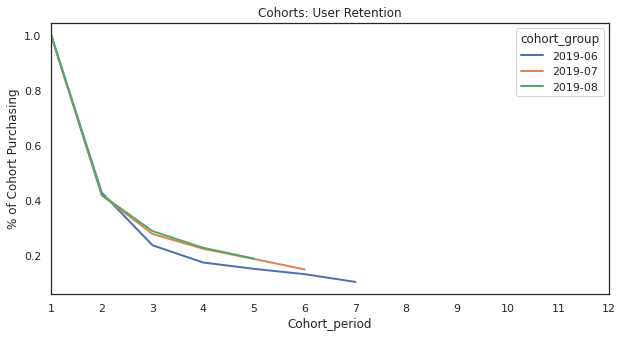

In [26]:
user_retention[['2019-06', '2019-07', '2019-08']].plot(figsize=(10,5))
plt.title('Cohorts: User Retention')
plt.xticks(np.arange(1, 12.1, 1))
plt.xlim(1, 12)
plt.ylabel('% of Cohort Purchasing');

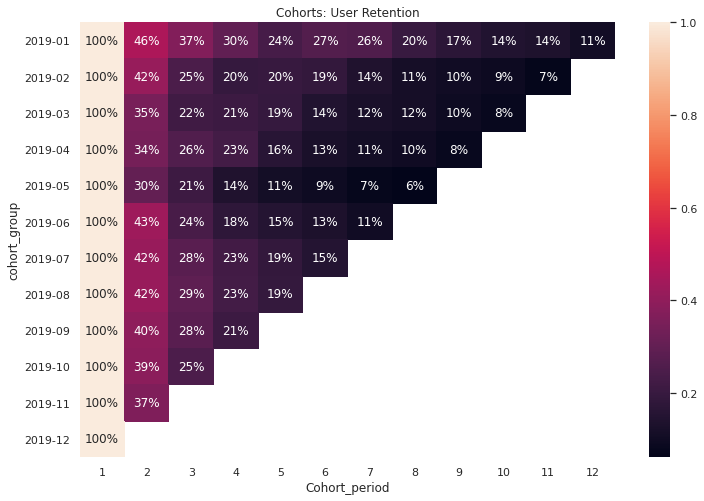

In [27]:
import seaborn as sns
sns.set(style='white')

plt.figure(figsize=(12, 8))
plt.title('Cohorts: User Retention')
sns.heatmap(user_retention.T, mask=user_retention.T.isnull(), annot=True, fmt='.0%');